In [1]:
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

# Data Ingestion

## Train Set

In [2]:
TRAIN_FILE_LOCATION = '/kaggle/input/movie-genre-prediction/train.csv'

train_df = pd.read_csv(TRAIN_FILE_LOCATION)

In [3]:
print(f"Size of training set: {len(train_df)}")

train_df.head(15)

Size of training set: 54000


,id,movie_name,synopsis,genre
0,44978,Super Me,A young scriptwriter starts bringing valuable ...,fantasy
1,50185,Entity Project,A director and her friends renting a haunted h...,horror
2,34131,Behavioral Family Therapy for Serious Psychiat...,This is an educational video for families and ...,family
3,78522,Blood Glacier,Scientists working in the Austrian Alps discov...,scifi
4,2206,Apat na anino,Buy Day - Four Men Widely - Apart in Life - By...,action
5,46636,Le démon dans l'île,"On an island, things start going crazy as the ...",horror
6,53777,Candid,A video voyeur stalks women in the city with a...,horror
7,24872,Hired,Twin brothers separated at birth and worlds ap...,crime
8,17224,Miruthan,A traffic police officer teams up with his fri...,adventure
9,54900,Until You See Me,A legendary tale unravels.,mystery


## Test Set

In [4]:
TEST_FILE_LOCATION = '/kaggle/input/movie-genre-prediction/test.csv'

test_df = pd.read_csv(TEST_FILE_LOCATION)

In [5]:
print(f"Size of test set: {len(test_df)}")
test_df.head(15)

Size of test set: 36000


,id,movie_name,synopsis,genre
0,16863,A Death Sentence,"12 y.o. Ida's dad'll die without a DKK1,500,00...",action
1,48456,Intermedio,A group of four teenage friends become trapped...,action
2,41383,30 Chua Phai Tet,A guy left his home for 12 years till he came ...,action
3,84007,Paranoiac,A man long believed dead returns to the family...,action
4,40269,Ordinary Happiness,"After a deadly accident, Paolo comes back on E...",action
5,16524,The Syndicate,"An alcoholic, his wife, a down and out America...",action
6,21245,12 Depths,"""Struck by amnesia and framed for murder, a ma...",action
7,84681,The Feud,A mysterious man returns to his home in Iowa f...,action
8,73352,Cabin Fever: Patient Zero,When a group of friends enjoying a bachelor cr...,action
9,37966,Peregrina,"After a near death experience, a young woman b...",action


# Data Analysis

## Class Labels

In [6]:
y_counts = train_df['genre'].value_counts()
y_counts

fantasy      5400
horror       5400
family       5400
scifi        5400
action       5400
crime        5400
adventure    5400
mystery      5400
romance      5400
thriller     5400
Name: genre, dtype: int64

## Movie Name Word Count 

In [7]:
movie_name_lengths = [len(name.split()) for name in train_df['movie_name']]
movie_name_lengths = pd.DataFrame(movie_name_lengths)

movie_name_lengths.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,54000.0,2.840741,1.683741,1.0,2.0,2.0,4.0,38.0


array([[<Axes: title={'center': '0'}>]], dtype=object)

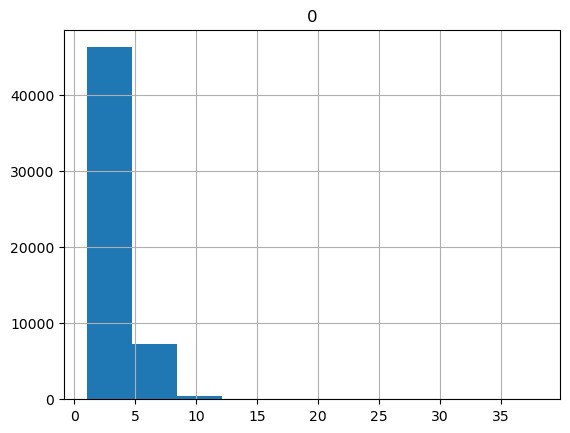

In [8]:
movie_name_lengths.hist()

In [9]:
np.percentile(movie_name_lengths, 99)

8.0

## Movie Synopsis Word Count

In [10]:
synopsis_lengths = [len(s.split()) for s in train_df['synopsis']]
synopsis_lengths = pd.DataFrame(synopsis_lengths)

synopsis_lengths.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,54000.0,26.237278,9.813433,1.0,19.0,26.0,34.0,70.0


array([[<Axes: title={'center': '0'}>]], dtype=object)

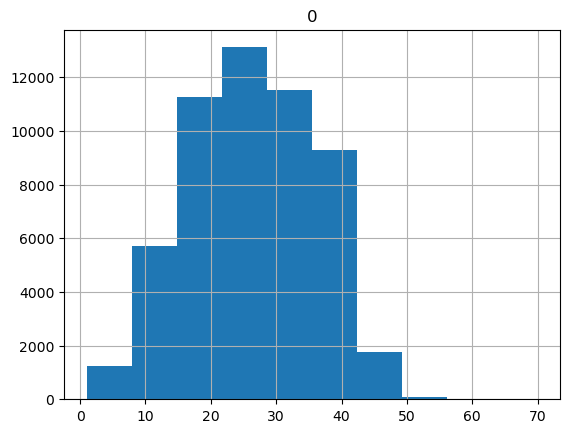

In [11]:
synopsis_lengths.hist()

In [12]:
np.percentile(synopsis_lengths, 99)

45.0

# Data Pre-processing

## Encoding the class labels

In [13]:
from sklearn.preprocessing import LabelEncoder

class_encoder = LabelEncoder()
class_encoder.fit(train_df['genre'])
CLASSES = class_encoder.classes_
CLASSES

array(['action', 'adventure', 'crime', 'family', 'fantasy', 'horror',
       'mystery', 'romance', 'scifi', 'thriller'], dtype=object)

In [14]:
class_encoder.transform(['action', 'crime', 'thriller'])

array([0, 2, 9])

## Preprocess the train and validationdatasets

In [15]:
from sklearn.model_selection import train_test_split

print(f"All train file rows: {len(train_df)}")
(train_set, val_set) = train_test_split(train_df, test_size=0.2)

print(f"Train set rows: {len(train_set)}")
print(f"Validation set rows: {len(val_set)}")

All train file rows: 54000
Train set rows: 43200
Validation set rows: 10800


In [16]:
from tensorflow.data import Dataset, AUTOTUNE

BATCH_SIZE = 64
def build_model_datasets(features, labels):
    y = class_encoder.transform(labels)
    dataset = Dataset.from_tensor_slices((features, y)).batch(BATCH_SIZE).prefetch(AUTOTUNE)
    
    return dataset

train_dataset = build_model_datasets(train_set['synopsis'], train_set['genre'])
val_dataset = build_model_datasets(val_set['synopsis'], val_set['genre'])

train_dataset, val_dataset, len(train_dataset), len(val_dataset)

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 675,
 169)

In [17]:
for i in train_dataset:
    print(i)
    break;

(<tf.Tensor: shape=(64,), dtype=string, numpy=
array([b'Struggling screenwriter Emily, who works in a gelato shop, writes a screenplay about struggling screenwriter Emma, who works in a coffee shop, and is secretly a superheroine named Emmageddon.',
       b'After a boy sees a man in Santa Claus suit kissing his mother, he thinks that the real Santa wants to replace his father, so he goes to prank-war with him.',
       b"Alice is appointed to save her beloved Mad Hatter from deadly grief by travelling back to the past, but this means fatally harming Time himself, the noble clockwork man with the device needed to save the Hatter's family from the Red Queen.",
       b'A police lieutenant uncovers more than he bargained for as his investigation of a series of murders, which have all the hallmarks of the deceased Gemini serial killer, leads him to question the patients of a psychiatric ward.',
       b'Still on the run from a group of Nazi zombies, a man seeks the aid of a group of Ameri

## The Vectorizer

In [18]:
from tensorflow.keras.layers import TextVectorization

SYNOPSIS_VOCAB_SIZE = 2048
SYNOPSIS_SEQ_LENGTH = 64

vectorizer = TextVectorization(max_tokens=SYNOPSIS_VOCAB_SIZE, output_sequence_length=SYNOPSIS_SEQ_LENGTH)
vectorizer.adapt(train_df['synopsis'])

In [19]:
vectorizer.get_vocabulary()[:5], vectorizer.get_vocabulary()[-5:]

(['', '[UNK]', 'a', 'the', 'to'],
 ['legends', 'fugitive', 'fresh', 'fiancée', 'en'])

In [20]:
vectorizer(train_df['synopsis'][0])

<tf.Tensor: shape=(64,), dtype=int64, numpy=
array([   2,   23,    1,  291,    1, 1869,    1,   73,   19,    8,  642,
       1118,    5,   93,    1,   15,    2,  578,    1,   50,  318,   31,
        323,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0])>

# Modelling

## Baseline Model: Dense Layer

In [21]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Dense, Input, GlobalAveragePooling1D

EMBEDDING_LENGTH = 256

def build_model_0():
    return Sequential([
        Input(shape=(1,), dtype=tf.string),
        vectorizer,
        Embedding(SYNOPSIS_VOCAB_SIZE, EMBEDDING_LENGTH, input_length=SYNOPSIS_SEQ_LENGTH),
        GlobalAveragePooling1D(),
        Dense(256, activation='relu'),
        Dense(len(CLASSES), activation='softmax')
    ], name='model_0')

In [22]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

def compile_model(model):
    model.compile(
        loss=SparseCategoricalCrossentropy(),
        optimizer=Adam(),
        metrics=['accuracy']
    )

In [23]:
model_0 = build_model_0()
compile_model(model_0)
model_0.summary()

Model: "model_0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 64)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 64, 256)           524288    
                                                                 
 global_average_pooling1d (G  (None, 256)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 256)               65792     
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 592,650
Trainable params: 592,650
Non-trainab

In [24]:
model_0_history = model_0.fit(train_dataset, epochs=5, validation_data=val_dataset)

Epoch 1/5
675/675 [==============================] - 34s 42ms/step - loss: 2.0696 - accuracy: 0.2419 - val_loss: 1.8984 - val_accuracy: 0.3168
Epoch 2/5
675/675 [==============================] - 4s 6ms/step - loss: 1.8284 - accuracy: 0.3442 - val_loss: 1.8624 - val_accuracy: 0.3356
Epoch 3/5
675/675 [==============================] - 4s 6ms/step - loss: 1.7642 - accuracy: 0.3703 - val_loss: 1.8529 - val_accuracy: 0.3424
Epoch 4/5
675/675 [==============================] - 4s 5ms/step - loss: 1.7218 - accuracy: 0.3847 - val_loss: 1.8529 - val_accuracy: 0.3419
Epoch 5/5
675/675 [==============================] - 4s 6ms/step - loss: 1.6879 - accuracy: 0.3967 - val_loss: 1.8565 - val_accuracy: 0.3403


<Axes: >

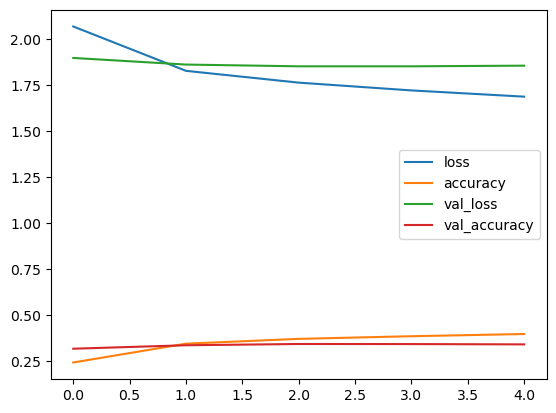

In [25]:
pd.DataFrame(model_0_history.history).plot()